In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from db import read_data_from_db

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 12)})


In [90]:
def add_date(data):
    # Convert unix ts into date
    data["date"] = pd.to_datetime(data['timestamp'], unit='s')
    return data

In [91]:
data = read_data_from_db()

In [92]:
data = add_date(data)
stations = list(data.name.unique())
stations

['Liverpool Street Station',
 'Whitechapel Station',
 'Monument Station',
 'Embankment Station',
 'Hyde Park Corner',
 'Hammersmith Station',
 'Edgware Road Station',
 'Angel Station',
 'Putney Bridge Station',
 'Victoria Station',
 'Old Street Station',
 'Mile End Station',
 "King's Cross",
 'Piccadilly Circus Station',
 'Elephant & Castle Station',
 'Waterloo Station',
 'Green Park Station',
 'Canada Water',
 'Clapham Junction',
 'South Kensington Station',
 'Oxford Circus Underground Station',
 'Paddington Station']

In [93]:
data.head(2)

,id,timestamp,name,address,types,current_popularity,latitude,longitude,popular_times,date
0,ChIJsUs1REwDdkgRX_9hC2x9f8U,1.584902e+09,Liverpool Street Station,"Liverpool St, London EC2M 7PY, UK","train_station,transit_station,point_of_interes...",1,51.518752,-0.081437,"[{'name': 'Monday', 'data': [2, 1, 1, 1, 0, 4,...",2020-03-22 18:34:30.299459219
1,ChIJM1I7780cdkgRHyeKVVMVE_0,1.584902e+09,Whitechapel Station,"277 Whitechapel Rd, Shadwell, London E1 1BY, UK","train_station,transit_station,point_of_interes...",10,51.519497,-0.061202,"[{'name': 'Monday', 'data': [2, 0, 0, 0, 0, 9,...",2020-03-22 18:34:31.246058702


In [94]:
def plot_daily(data, station):
    df = data.copy(deep=True)
    df.set_index('date', inplace=True)
    df = df[df.name == station]
    df['current_popularity'].plot(linewidth=2)

In [95]:
def plot_daily_aggregated(data, station):
    df = data.copy(deep=True)
    df.set_index('date', inplace=True)
    df = df[df.name == station]
    # df = df.groupby('date')
    df['current_popularity'].plot(linewidth=2)

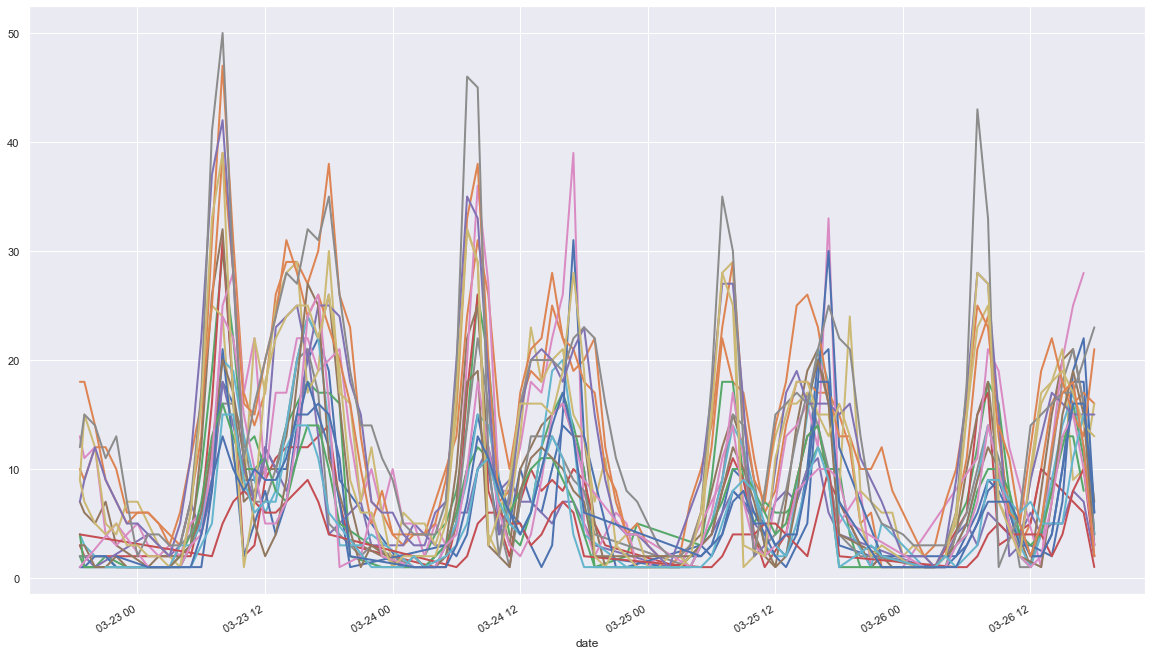

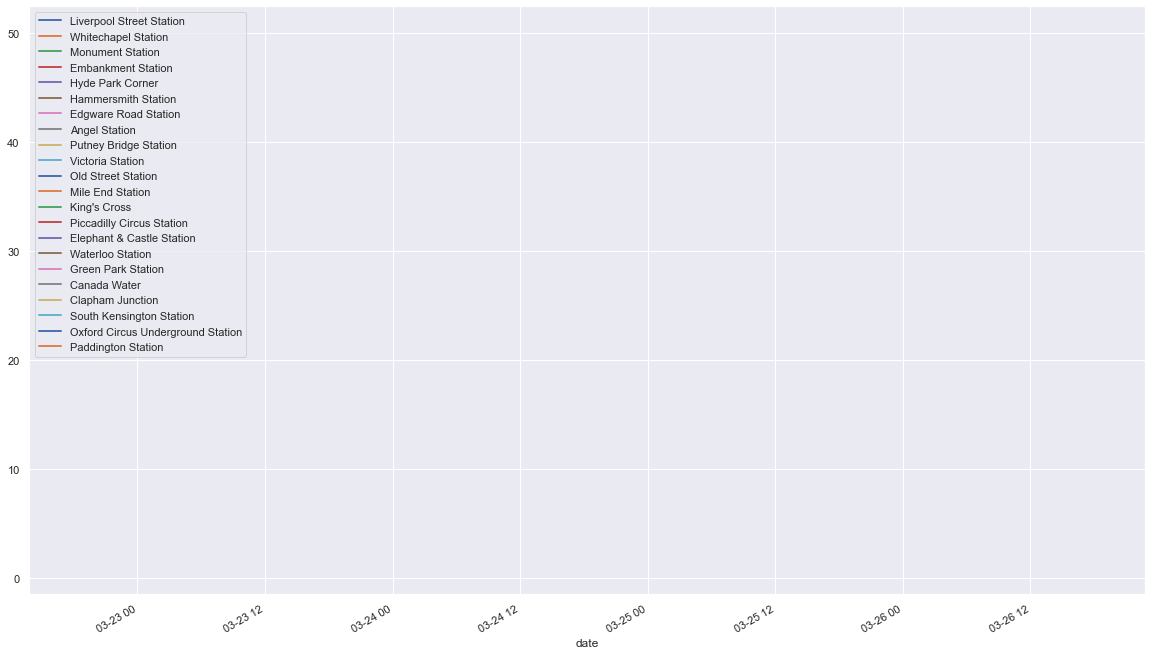

In [96]:
for station in stations:
    plt.figure(0)
    plot_daily(data, station)
    plt.figure(1)
    plot_daily_aggregated(data, station)

    
plt.legend(stations, loc='upper left')
plt.gcf().autofmt_xdate()


Next steps:

- Aggregate data:
    - Daily `current_popularity` per station
        - Show this over time
        - +/- percentage change to previous day
- Compare `current_popularity` to the value in `populartimes` for a point in time
    - +/- differnce to value in `populartimes` for a point in time (a normal day)
- Do the `populartimes` values change over time as well???